Program to check out previous flights from the P3 to calculate various speeds..

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
%matplotlib nbagg
import numpy as np
import Pysolar.solar as sol
import datetime
fp='C:/Users/sleblan2/Research/flight_planning/p3_flights/'

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import load_utils as lm
reload(lm)

<module 'load_modis' from 'load_modis.pyc'>

In [3]:
from Sp_parameters import smooth

## P3 during ARCTAS

In [37]:
arctas,header = lm.load_ict(fp+'pds_p3b_20080419_r2.ict',return_header=True)
header

('Time', 'FMS_ALT_PRES', 'FMS_TAS', 'FMS_SAT', 'FMS_LAT', 'FMS_LON', 'FMS_GRD_SPD', 'FMS_HDG', 'FMS_TRK', 'FMS_WNS', 'FMS_WND', 'IRS_PITCH', 'IRS_ROLL', 'ADC_MACH', 'ADC_IAS', 'GPS_ALT', 'A_DP1011', 'A_TotalTempDegC', 'A_CabinPressure', 'A_SurfTemp', 'C_StaticPressure', 'C_DiffPressure', 'C_TotalTempDegK', 'C_StatTempDegK', 'C_StatTempDegC', 'C_PotTempDegK', 'C_CabAltitude', 'C_VaporPres', 'C_SatVaporPresWater', 'C_SatVaporPresIce', 'C_RelHumidityWater', 'C_RelHumidityIce', 'C_MixingRatio', 'C_CorrectRadarAlt')


In [41]:
vert_speed_ft = np.diff(arctas['GPS_ALT'])
arctas['GPS_ALT']

In [45]:
vert_speed = vert_speed_ft*0.3084

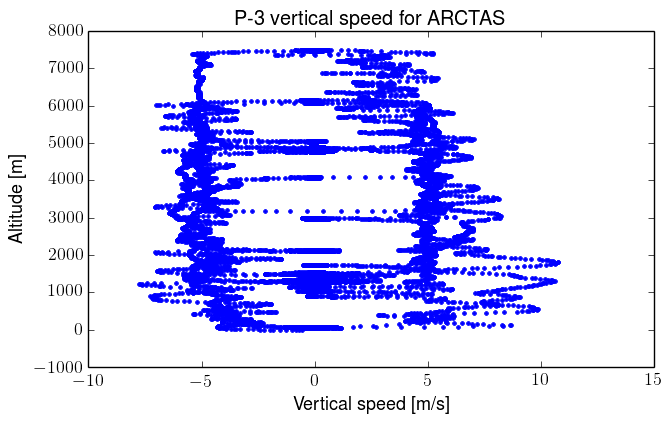

In [55]:
plt.plot(smooth(vert_speed,10),smooth(arctas['GPS_ALT'][1:]*0.3084,10),'b.')
plt.xlabel('Vertical speed [m/s]')
plt.ylabel('Altitude [m]')
plt.title('P-3 vertical speed for ARCTAS')

## P3 during DISCOVER-AQ Denver

In [58]:
discover = lm.load_ict(fp+'discoveraq-pds_p3b_20140807_r1.ict')

('UTC', 'FMS_ALT_PRES', 'FMS_TAS', 'FMS_SAT', 'FMS_LAT', 'FMS_LON', 'FMS_GRD_SPD', 'FMS_HDG', 'FMS_TRK', 'FMS_WNS', 'FMS_WND', 'IRS_PITCH', 'IRS_ROLL', 'IRS_VERT_ACC', 'ADC_IAS', 'GPS_ALT', 'A_DewPoint', 'A_CabinPressure', 'A_SurfTemp', 'A_TotalTemp', 'A_JNO2_Nadir', 'A_JNO2_Zenith', 'A_RadarAlt', 'C_StaticPressure', 'C_DiffPressure', 'C_StatTempDegC', 'C_PotTempDegK', 'C_MachNumber', 'C_CabAltitude', 'C_VaporPresWater', 'C_SatVaporPresWater', 'C_SatVaporPresIce', 'C_MixingRatio', 'C_RelHumidity')


In [59]:
d_vert_speed_ft = np.diff(discover['GPS_ALT'])

In [60]:
d_vert_speed = d_vert_speed_ft*0.3084

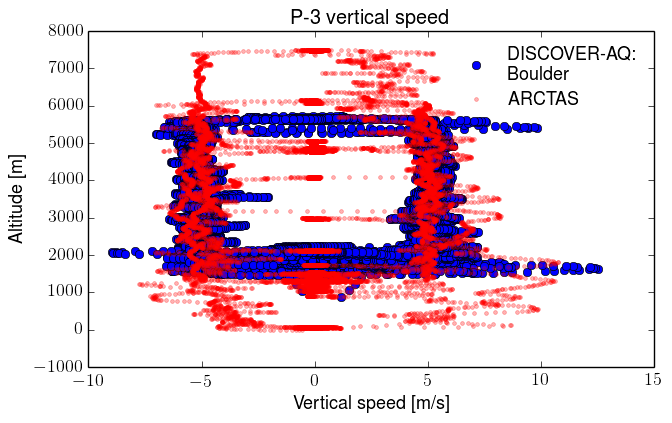

In [68]:
plt.plot(smooth(d_vert_speed,10),smooth(discover['GPS_ALT'][1:]*0.3084,10),'bo',label='DISCOVER-AQ:\n Boulder')
plt.plot(smooth(vert_speed,10),smooth(arctas['GPS_ALT'][1:]*0.3084,10),'r.',alpha=0.3,label='ARCTAS')
plt.xlabel('Vertical speed [m/s]')
plt.ylabel('Altitude [m]')
plt.title('P-3 vertical speed')
plt.legend(frameon=False,numpoints=1)
plt.savefig(fp+'P3_vert_speed.png',dpi=600,transparent=True)

In [109]:
vs_up = smooth(vert_speed[(vert_speed>1)&(arctas['GPS_ALT'][1:]*0.3084>6000)],10)

In [110]:
alt_up = smooth(arctas['GPS_ALT'][1:][(vert_speed>1)&(arctas['GPS_ALT'][1:]*0.3084>6000)],10)

In [112]:
v,xx = linfit.linfit(alt_up,vs_up)

In [114]:
p3_slope,p3_interp = v

In [115]:
p3_slope

-7.1240399084697678e-05

In [118]:
alt1

6500.0

In [123]:
alt0 = 5000.0

In [124]:
speed = 5.0

In [125]:
climb_time = (alt1-alt0)/speed

In [126]:
climb_time

300.0

## For ER2 during SEAC4RS

In [4]:
er2,header = lm.load_ict(fp+'seac4rs-nasdat_er2_20130821_r0.ict',return_header=True)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Altitude', 'Pressure_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Mach_Number', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Total_Air_Temp', 'E_Bay_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle', 'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth')


In [5]:
er2_2 = lm.load_ict(fp+'seac4rs-nasdat_er2_20130922_r0.ict',return_header=False)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Altitude', 'Pressure_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Mach_Number', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Total_Air_Temp', 'E_Bay_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle', 'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth')


In [6]:
header

['54,1001\n',
 'Project Office\n',
 'UARC/NSERC\n',
 'ER-2 (809) NASDAT\n',
 'SEAC4RS 2013 - Studies of Emissions and Atmospheric Composition, Clouds, and Climate Coupling by Regional Surveys\n',
 '1,1\n',
 '2013,08,21,2014,04,01\n',
 '1\n',
 'Start_UTC,seconds\n',
 '21\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999\n',
 'Latitude, deg\n',
 'Longitude, deg\n',
 'GPS_Altitude, m\n',
 'Pressure_Altitude, ft\n',
 'Ground_Speed, m/s\n',
 'True_Air_Speed, m/s\n',
 'Mach_Number, mach\n',
 'True_Heading, deg (0-360)\n',
 'Track_Angle, deg (0-360)\n',
 'Drift_Angle, deg\n',
 'Pitch_Angle, deg (+-180)\n',
 'Roll_Angle, deg (+-180)\n',
 'Static_Air_Temp, Celsius\n',
 'Total_Air_Temp, Celsius\n',
 'E_Bay_Pressure, mb\n',
 'Wind_Speed, m/s\n',
 'Wind_Direction, deg (0-360)\n',
 'Solar_Zenith_Angle, deg\n',
 'Aircraft_Sun_Elevation, deg\n',
 'Sun_Azimuth, deg\n',
 'Ai

In [7]:
er2_vs = np.diff(er2['GPS_Altitude'])

In [8]:
er22_vs = np.diff(er2_2['GPS_Altitude'])

In [9]:
import plotting_utils as pu

<IPython.core.display.Javascript object>


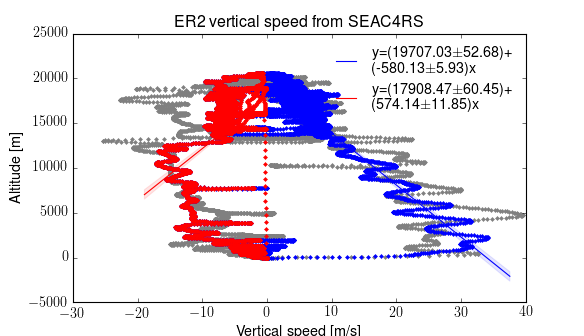

In [10]:
plt.plot(smooth(er22_vs,20),smooth(er2_2['GPS_Altitude'][1:],20),'.',color='grey')
plt.plot(smooth(er2_vs,20),smooth(er2['GPS_Altitude'][1:],20),'b.')
plt.plot(smooth(er2_vs[er2_vs<0],20),smooth(er2['GPS_Altitude'][1:][er2_vs<0],20),'r.')
pu.plot_lin(smooth(er2_vs[er2_vs>2],20),smooth(er2['GPS_Altitude'][1:][er2_vs>2],20))
pu.plot_lin(smooth(er2_vs[er2_vs<0],20),smooth(er2['GPS_Altitude'][1:][er2_vs<0],20),color='r')
plt.xlabel('Vertical speed [m/s]')
plt.ylabel('Altitude [m]')
plt.title('ER2 vertical speed from SEAC4RS')
plt.legend(frameon=False)
plt.savefig(fp+'ER2_vert_speed.png',dpi=600,transparent=True)

Get the inverse relationship for alt to vert speed

In [11]:
import linfit
v = linfit.linfit(smooth(er2['GPS_Altitude'][1:][er2_vs>2],20),smooth(er2_vs[er2_vs>2],20))

In [12]:
slope = v[0][0]
intercept = v[0][1]

In [13]:
slope,intercept

(-0.0010920765181533334, 24.061533363649215)

<IPython.core.display.Javascript object>


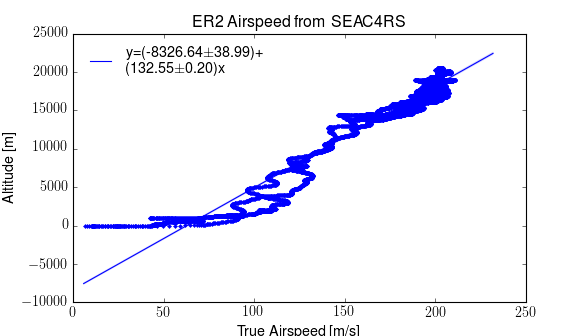

In [23]:
plt.figure()
plt.plot(smooth(er2['True_Air_Speed'],10),smooth(er2['GPS_Altitude'],10),'.',color='blue')
pu.plot_lin(smooth(er2['True_Air_Speed'],10),smooth(er2['GPS_Altitude'],10),color='blue')
plt.legend(frameon=False,loc=2)
plt.xlabel('True Airspeed [m/s]')
plt.ylabel('Altitude [m]')
plt.title('ER2 Airspeed from SEAC4RS')
plt.savefig(fp+'ER2_airspeed.png',dpi=600,transparent=True)

In [24]:
vy = linfit.linfit(smooth(er2['GPS_Altitude'],10),smooth(er2['True_Air_Speed'],10))

In [25]:
slopey,intercepty = vy[0]

In [26]:
slopey,intercepty

(0.0071031985846115213, 70.141068473788195)

## For DC8 during SEAC4RS

In [127]:
dc8,dc8header = lm.load_ict(fp+'nav_dc8_20080320_r1.ict',return_header=True)

('UTC', 'LAT', 'LON', 'GPS_ALT', 'PITCH', 'ROLL', 'WND_SPD', 'WND_DIR', 'T_AIR_SPD', 'GRD_SPD', 'HDG', 'DRIFT', 'P_ALT', 'C_RDR_ALT', 'DPT', 'SAT', 'TAT', 'IR_T_SURF', 'SAT_CALC', 'IND_AIR_SPD', 'VERT_AIR_SPD', 'CAB_ALT', 'P_STAT', 'MACH', 'TRK_ANGLE', 'MIX_RATIO', 'VAPOR_PRES', 'RH_ICE', 'RH_H2O', 'SAT_VP_H2O', 'SAT_VP_ICE', 'SUN_ELEV_EARTH', 'SUN_ELEV_PLANE', 'SUN_AZM_EARTH', 'SUN_AZM_PLANE', 'CAB_TEMP')


In [128]:
dc8header

['77  1001\n',
 'Project Office\n',
 'NSERC - National Suborbital Education and Research Center\n',
 'DC-8 Data Acquisition and Distribution -- REVEAL\n',
 'NASA ARCTAS MISSION 2008\n',
 '1  1\n',
 '2008  03  20  2009  02  27\n',
 '1.0\n',
 'Start_UTC time, seconds\n',
 '35\n',
 '1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 \n',
 '-99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999 -99999\n',
 'Latitude, deg\n',
 'Longitude, deg\n',
 'GPS_Altitude, m \n',
 'Pitch, deg\n',
 'Roll, deg\n',
 'Wind_Speed, kts\n',
 'Wind_Dir, deg\n',
 'True_Air_Spd, kts\n',
 'Ground_Speed, kts\n',
 'True_Heading, deg\n',
 'Drift_Angle, deg\n',
 'Pressure_Alt, ft\n',
 'Radar_Altitude, ft\n',
 'DF_Point_2, C\n',
 'Static_Air_Temp, C\n',
 'Total_Air_Temp, C\n',
 'IR_Surf_temp, C\n',
 'Sat_Computed, C\n'

In [132]:
dc8_vs = np.diff(dc8['GPS_ALT'])

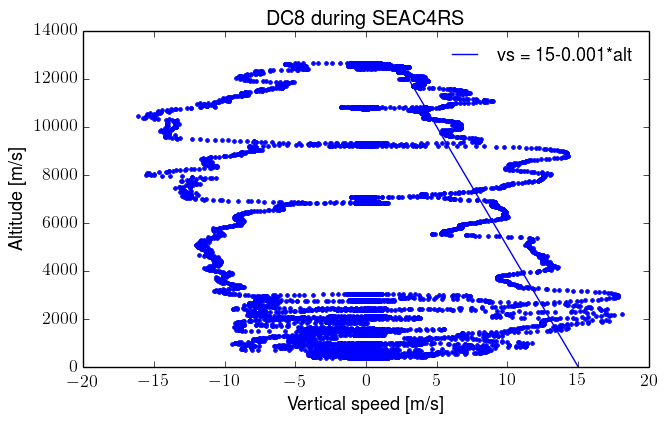

In [141]:
plt.plot(smooth(dc8_vs,10),smooth(dc8['GPS_ALT'][1:],10),'b.')
plt.plot(15.0-0.001*np.linspace(0,12000),np.linspace(0,12000),label='vs = 15-0.001*alt')
plt.title('DC8 during SEAC4RS')
plt.xlabel('Vertical speed [m/s]')
plt.ylabel('Altitude [m/s]')
plt.legend(frameon=False)
plt.savefig(fp+'DC8_vert_speed.png',dpi=600,transparent=True)

## C130 during ARISE

In [142]:
c130,c130header = lm.load_ict(fp+'arise-C130-Hskping_c130_20140911_RA_Preliminary.ict',return_header=True)

('Start_UTC', 'Day_Of_Year', 'Latitude', 'Longitude', 'GPS_Altitude', 'Pressure_Altitude', 'Ground_Speed', 'True_Air_Speed', 'Indicated_Air_Speed', 'Mach_Number', 'Vertical_Speed', 'True_Heading', 'Track_Angle', 'Drift_Angle', 'Pitch_Angle', 'Roll_Angle', 'Static_Air_Temp', 'Potential_Temp', 'Dew_Point_3Stage', 'Total_Air_Temp', 'IR_Surf_Temp', 'Static_Pressure', 'Cabin_Pressure', 'Wind_Speed', 'Wind_Direction', 'Solar_Zenith_Angle', 'Aircraft_Sun_Elevation', 'Sun_Azimuth', 'Aircraft_Sun_Azimuth', 'Mixing_Ratio', 'Part_Press_Water_Vapor', 'Sat_Vapor_Press_H2O', 'Sat_Vapor_Press_Ice', 'Relative_Humidity')


In [143]:
c130header

['66,1001\n',
 'Project Office\n',
 'NSERC - National Suborbital Education and Research Center\n',
 'C-130 (N439NA) Data Acquisition and Distribution\n',
 'ARISE 2014\n',
 '1,1\n',
 '2014,09,11,2014,11,22\n',
 '1\n',
 'Start_UTC,seconds\n',
 '33\n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999\n',
 'Day_Of_Year,\n',
 'Latitude, deg\n',
 'Longitude, deg            \n',
 'GPS_Altitude, m         \n',
 'Pressure_Altitude, ft      \n',
 'Ground_Speed, m/s           \n',
 'True_Air_Speed, kts       \n',
 'Indicated_Air_Speed, kts   \n',
 'Mach_Number, mach         \n',
 'Vertical_Speed, m/s       \n',
 'True_Heading, deg (0-360)         \n',
 'Track_Angle, deg (0-360)            \n',
 'Drift_Angle, deg            \n',
 'Pitch_Angle, deg (+-180)              \n',
 'Rol

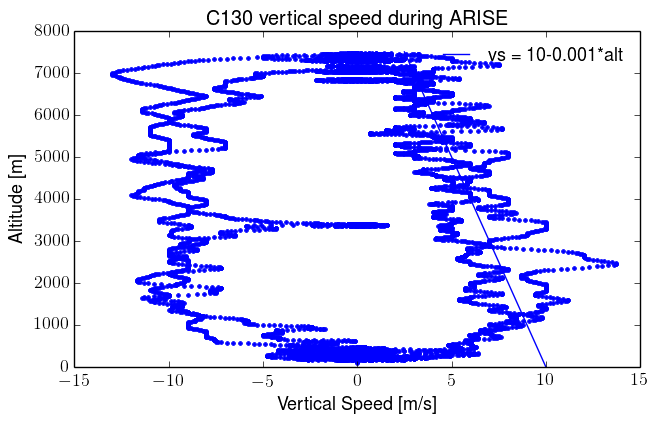

In [147]:
plt.plot(smooth(c130['Vertical_Speed'],10),smooth(c130['GPS_Altitude'],10),'b.')
plt.plot(10-0.001*np.linspace(0,7500),np.linspace(0,7500),label='vs = 10-0.001*alt')
plt.title('C130 vertical speed during ARISE')
plt.xlabel('Vertical Speed [m/s]')
plt.ylabel('Altitude [m]')
plt.legend(frameon=False)
plt.savefig(fp+'C130_vert_speed.png',dpi=600,transparent=True)